In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
opiod_df= pd.read_csv('CA opiod precribed.csv')

In [3]:
opiod_df.dtypes

xYear               int64
State              object
County             object
Age_Group          object
rundatetime        object
PatCount_Opioid     int64
Population         object
dtype: object

In [4]:
# removing any missing data rows

opiod_df.dropna()

,xYear,State,County,Age_Group,rundatetime,PatCount_Opioid,Population
0,2015,CA,Alameda,15-24 yrs,04APR2021:08:30:51,24853,"1,515,717"
1,2015,CA,Alpine,15-24 yrs,04APR2021:08:30:51,16,"1,115"
2,2015,CA,Amador,15-24 yrs,04APR2021:08:30:51,726,"38,211"
3,2015,CA,Butte,15-24 yrs,04APR2021:08:30:51,5971,"220,287"
4,2015,CA,Calaveras,15-24 yrs,04APR2021:08:30:51,921,"45,570"
...,...,...,...,...,...,...,...
1735,2020,CA,Tulare,>= 65 yrs,04APR2021:08:30:51,16256,"438,352"
1736,2020,CA,Tuolumne,>= 65 yrs,04APR2021:08:30:51,4170,"54,242"
1737,2020,CA,Ventura,>= 65 yrs,04APR2021:08:30:51,35165,"827,963"
1738,2020,CA,Yolo,>= 65 yrs,04APR2021:08:30:51,7239,"202,753"


In [5]:
# converting to integer

opiod_df['PatCount_Opioid'].astype(int)


0       24853
1          16
2         726
3        5971
4         921
        ...  
1735    16256
1736     4170
1737    35165
1738     7239
1739     3517
Name: PatCount_Opioid, Length: 1740, dtype: int32

In [6]:
# removing commas in population column

opiod_df.Population = opiod_df.Population.apply(lambda x : x.replace(',',''))


In [7]:
# changing population column to integer

opiod_df['Population']=opiod_df['Population'].astype(int)

Text(0.5, 0, 'County')

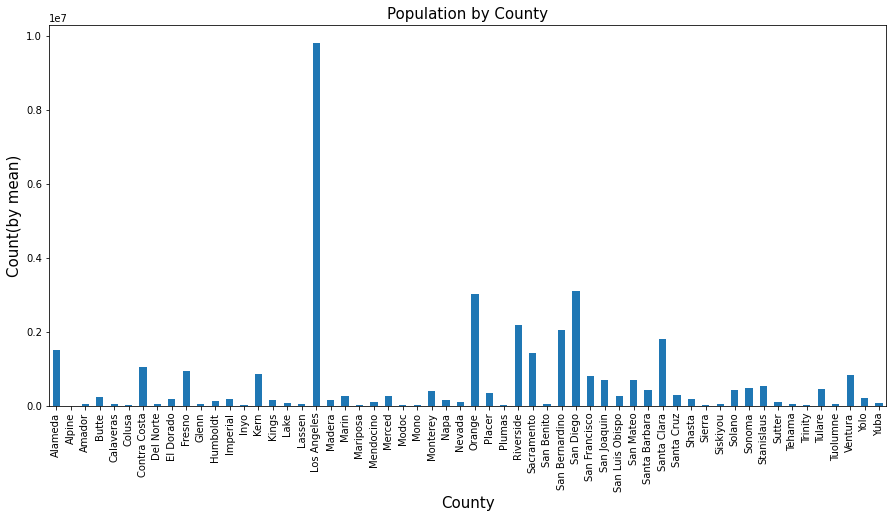

In [8]:
#barplot of population by county

plt.rcParams['figure.figsize'] = (15, 7)        
opiod_df.groupby('County', sort=True)['Population'].mean().plot(kind='bar')
plt.ylabel('Count(by mean)', fontsize=15)
plt.title('Population by County', fontsize=15)
plt.xlabel('County', fontsize=15)

In [9]:
# creating function to group counties by region

def label_county (row):
    if row['County'] in ['Alameda', 'Alpine', 'Amador', 'Calaveras', 'Contra Costa', 'El Dorado', 'Fresno', 'Inyo','Kings', 'Medera','Marin','mariposa','Merced','Mono','Monteray','Napa','Placer','Sacramento','San Benito','San Francisco','San Joaquin','San Mateo','Santa Clara','Solano','Sonoma','Stanislaus','Tulare','Tuolumne','Yolo']:
        return 'Central Cali'
    if row['County'] in ['Butte', 'Del Norte','Glenn', 'Humboldt', 'Lake', 'Lassen', 'Mendocino', 'Modoc', 'Nevada', 'Plumas', 'Shasta', 'Sierra', 'Siskiyou', 'Sutter','Tehama','Trinity','Yuba']:
        return 'Northern Cali'
    if row['County'] in ['Imperial', 'Los Angeles', 'Kern', 'Orange', 'Riverside', 'San Bernardino', 'San Diego', 'San Luis Obispo', 'Santa Barbara', 'Ventura', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        return 'So Cal'
    

In [10]:
# applying function above to my data set, creating a new column called Region.

opiod_df['Region'] = opiod_df.apply(lambda row: label_county(row), axis=1) 

Text(0.5, 0, 'Region')

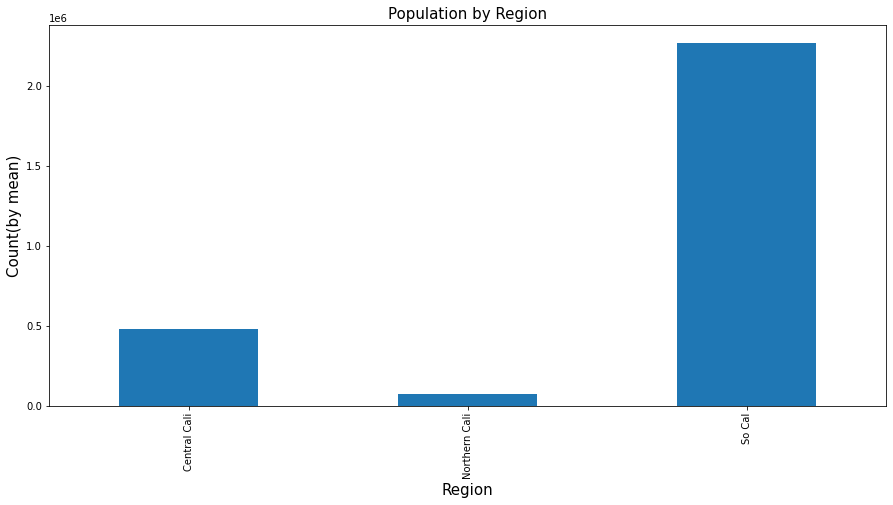

In [11]:
#barplot of population by county

plt.rcParams['figure.figsize'] = (15, 7)        
opiod_df.groupby('Region', sort=True)['Population'].mean().plot(kind='bar')
plt.ylabel('Count(by mean)', fontsize=15)
plt.title('Population by Region', fontsize=15)
plt.xlabel('Region', fontsize=15)

In [12]:
# determining % opioid distributed per population

opiod_df['opiod_pct'] = opiod_df.PatCount_Opioid/ opiod_df.Population

In [13]:
opiod_df['opiod_pct']= opiod_df['opiod_pct']*100

In [14]:
# rounding to a single demicimal place

opiod_df['opiod_pct']=opiod_df['opiod_pct'].round(1)

Text(0.5, 0, 'Region')

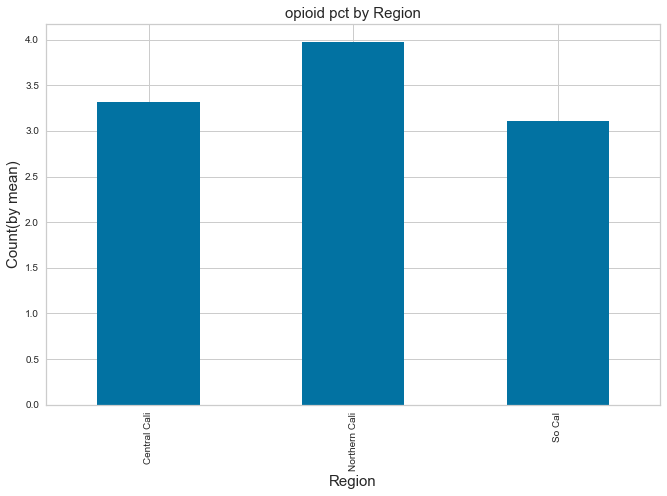

In [95]:
# opioid % mean by regions

plt.rcParams['figure.figsize'] = (11, 7)        
opiod_df.groupby('Region', sort=True)['opiod_pct'].mean().plot(kind='bar')
plt.ylabel('Count(by mean)', fontsize=15)
plt.title('opioid pct by Region', fontsize=15)
plt.xlabel('Region', fontsize=15)

In [15]:
opiod_df

,xYear,State,County,Age_Group,rundatetime,PatCount_Opioid,Population,Region,opiod_pct
0,2015,CA,Alameda,15-24 yrs,04APR2021:08:30:51,24853,1515717,Central Cali,1.6
1,2015,CA,Alpine,15-24 yrs,04APR2021:08:30:51,16,1115,Central Cali,1.4
2,2015,CA,Amador,15-24 yrs,04APR2021:08:30:51,726,38211,Central Cali,1.9
3,2015,CA,Butte,15-24 yrs,04APR2021:08:30:51,5971,220287,Northern Cali,2.7
4,2015,CA,Calaveras,15-24 yrs,04APR2021:08:30:51,921,45570,Central Cali,2.0
...,...,...,...,...,...,...,...,...,...
1735,2020,CA,Tulare,>= 65 yrs,04APR2021:08:30:51,16256,438352,Central Cali,3.7
1736,2020,CA,Tuolumne,>= 65 yrs,04APR2021:08:30:51,4170,54242,Central Cali,7.7
1737,2020,CA,Ventura,>= 65 yrs,04APR2021:08:30:51,35165,827963,So Cal,4.2
1738,2020,CA,Yolo,>= 65 yrs,04APR2021:08:30:51,7239,202753,Central Cali,3.6


In [16]:
# creating new column called label that captures if precribed opiod percent exceeds 3% or not(flag, clear)

opiod_df.loc[opiod_df['opiod_pct']>=5, 'label']= 'High risk'
opiod_df.loc[opiod_df['opiod_pct'].between(3, 4.99), 'label']= 'moderate risk'
opiod_df.loc[opiod_df['opiod_pct']<3, 'label']= 'low risk'


In [17]:
opiod_df['label']

0            low risk
1            low risk
2            low risk
3            low risk
4            low risk
            ...      
1735    moderate risk
1736        High risk
1737    moderate risk
1738    moderate risk
1739    moderate risk
Name: label, Length: 1740, dtype: object

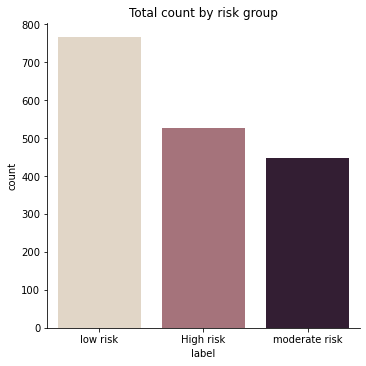

In [18]:
# visual chart displaying total count by risk group

fig=sns.catplot(x="label", kind="count", palette="ch:.25", data=opiod_df)
plt.title("Total count by risk group") 
plt.show(fig)

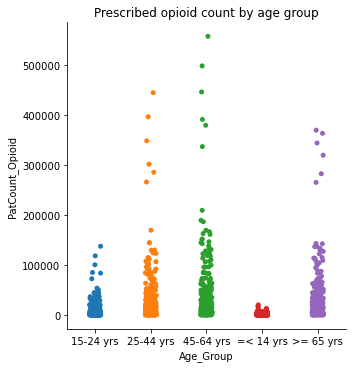

In [19]:
# visual display of opioid count by age group

fig= sns.catplot(x="Age_Group", y="PatCount_Opioid", data=opiod_df)
plt.title('Prescribed opioid count by age group')
plt.show(fig)

In [20]:
#getting rid of >=< symbols from results in column

opiod_df["Age_Group"].replace({"=< 14 yrs" : "0-14 yrs", ">= 65 yrs": "65-100 yrs"}, inplace=True)
opiod_df

,xYear,State,County,Age_Group,rundatetime,PatCount_Opioid,Population,Region,opiod_pct,label
0,2015,CA,Alameda,15-24 yrs,04APR2021:08:30:51,24853,1515717,Central Cali,1.6,low risk
1,2015,CA,Alpine,15-24 yrs,04APR2021:08:30:51,16,1115,Central Cali,1.4,low risk
2,2015,CA,Amador,15-24 yrs,04APR2021:08:30:51,726,38211,Central Cali,1.9,low risk
3,2015,CA,Butte,15-24 yrs,04APR2021:08:30:51,5971,220287,Northern Cali,2.7,low risk
4,2015,CA,Calaveras,15-24 yrs,04APR2021:08:30:51,921,45570,Central Cali,2.0,low risk
...,...,...,...,...,...,...,...,...,...,...
1735,2020,CA,Tulare,65-100 yrs,04APR2021:08:30:51,16256,438352,Central Cali,3.7,moderate risk
1736,2020,CA,Tuolumne,65-100 yrs,04APR2021:08:30:51,4170,54242,Central Cali,7.7,High risk
1737,2020,CA,Ventura,65-100 yrs,04APR2021:08:30:51,35165,827963,So Cal,4.2,moderate risk
1738,2020,CA,Yolo,65-100 yrs,04APR2021:08:30:51,7239,202753,Central Cali,3.6,moderate risk


In [21]:
#getting total precribed order by year

year_df= opiod_df.groupby('xYear', as_index=False).agg({"PatCount_Opioid": "sum"})
year_df

,xYear,PatCount_Opioid
0,2015,7126766
1,2016,4812163
2,2017,6339863
3,2018,5654496
4,2019,5013324
5,2020,4414312


Text(0.5, 1.0, 'Precribed Opioid count by year')

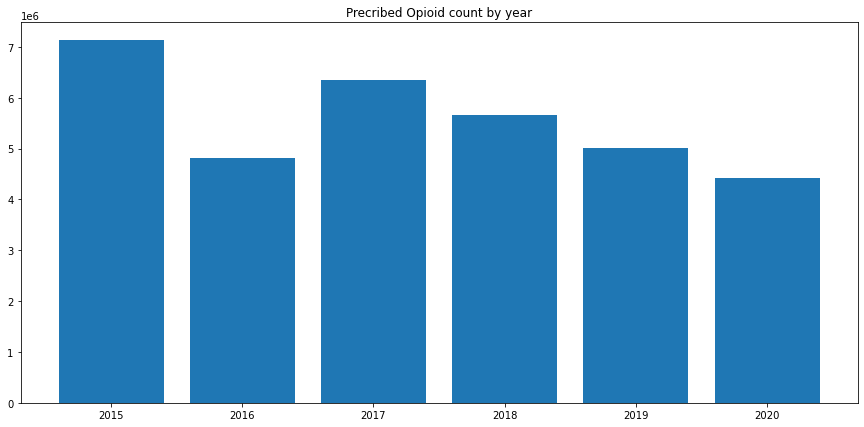

In [22]:
plt.bar(year_df['xYear'], year_df['PatCount_Opioid'])
plt.title('Precribed Opioid count by year')

In [23]:
# subsetting data by year

twenty_fifteen_df = opiod_df[opiod_df["xYear"] == 2015]
twenty_sixteen_df = opiod_df[opiod_df["xYear"] == 2016]
twenty_seventeen_df = opiod_df[opiod_df["xYear"] == 2017]
twenty_eighteen_df = opiod_df[opiod_df["xYear"] == 2018]
twenty_nineteen_df = opiod_df[opiod_df["xYear"] == 2019]
twenty_twenty_df = opiod_df[opiod_df["xYear"] == 2020]

In [24]:
# grouping total opioids count by county

fifteen_County_df= twenty_fifteen_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})
sixteen_County_df= twenty_sixteen_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})
seventeen_County_df= twenty_seventeen_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})
eighteen_County_df= twenty_eighteen_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})
nineteen_County_df= twenty_nineteen_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})
twenty_County_df= twenty_twenty_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})

In [25]:
# top five patient precribed counties for 2015
five_top_county= fifteen_County_df.nlargest(5, ['PatCount_Opioid'])
five_top_county

,County,PatCount_Opioid
18,Los Angeles,1530405
36,San Diego,583503
29,Orange,528224
32,Riverside,460630
35,San Bernardino,429124


In [26]:
# top five patient precribed counties for 2016
sixteen_top_county= sixteen_County_df.nlargest(5, ['PatCount_Opioid'])
sixteen_top_county

,County,PatCount_Opioid
18,Los Angeles,1028827
36,San Diego,397217
29,Orange,359756
32,Riverside,319321
35,San Bernardino,294379


In [27]:
# top five patient precribed counties for 2017
seventeen_top_county= seventeen_County_df.nlargest(5, ['PatCount_Opioid'])
seventeen_top_county

,County,PatCount_Opioid
18,Los Angeles,1395063
36,San Diego,525663
29,Orange,480323
32,Riverside,424544
35,San Bernardino,386207


In [28]:
# top five patient precribed counties for 2018
eighteen_top_county= eighteen_County_df.nlargest(5, ['PatCount_Opioid'])
eighteen_top_county

,County,PatCount_Opioid
18,Los Angeles,1254354
36,San Diego,462016
29,Orange,429145
32,Riverside,386475
35,San Bernardino,341416


In [29]:
# top five patient precribed counties for 2019
nineteen_top_county= nineteen_County_df.nlargest(5, ['PatCount_Opioid'])
nineteen_top_county

,County,PatCount_Opioid
18,Los Angeles,1109225
36,San Diego,410085
29,Orange,383440
32,Riverside,344333
35,San Bernardino,297601


In [30]:
# top five patient precribed counties for 2020
twenty_top_county= twenty_County_df.nlargest(5, ['PatCount_Opioid'])
twenty_top_county

,County,PatCount_Opioid
18,Los Angeles,967605
36,San Diego,363758
29,Orange,338985
32,Riverside,304252
35,San Bernardino,264209


In [31]:
# grouping top 5 counties by total precribed opioids 2015-2020

In [32]:
county_df= opiod_df.groupby('County', as_index=False).agg({"PatCount_Opioid": "sum"})

In [33]:
top_county= county_df.nlargest(5, ['PatCount_Opioid'])

Text(0.5, 1.0, 'Top 5 Counties for prescribed Opioids 2015-2020')

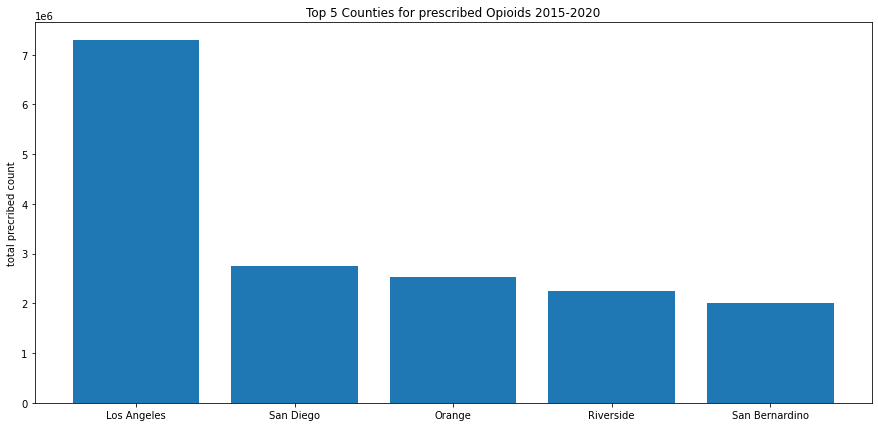

In [34]:
plt.bar(top_county['County'], top_county['PatCount_Opioid'])
plt.ylabel('total precribed count')
plt.title('Top 5 Counties for prescribed Opioids 2015-2020')

In [35]:
# grouping top 5 counties by percent opioids prescribed 2015-2020

opiod_pct_df= opiod_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})

In [36]:
opiod_pct_top= opiod_pct_df.nlargest(5,['opiod_pct'])

In [37]:
opiod_pct_top

,County,opiod_pct
16,Lake,5.123333
4,Calaveras,4.543333
3,Butte,4.503333
54,Tuolumne,4.473333
57,Yuba,4.460000


Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2015-2020')

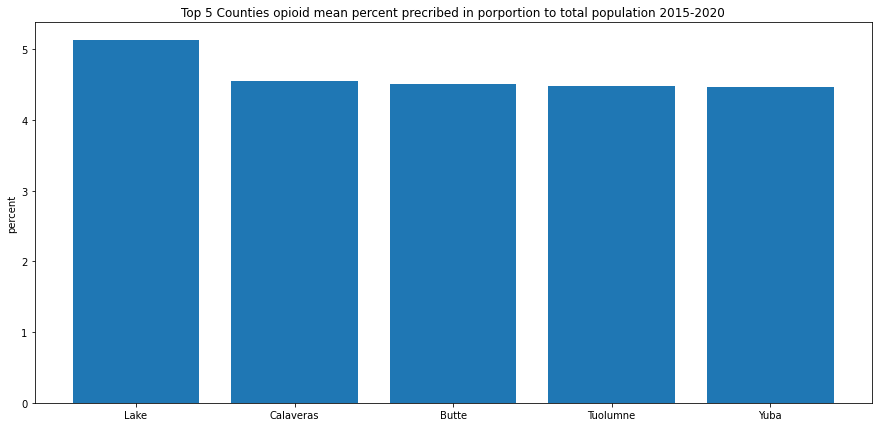

In [38]:
plt.bar(opiod_pct_top['County'], opiod_pct_top['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2015-2020')

In [39]:
# grouping total opioids count by county

fifteen_County_df= twenty_fifteen_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})
sixteen_County_df= twenty_sixteen_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})
seventeen_County_df= twenty_seventeen_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})
eighteen_County_df= twenty_eighteen_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})
nineteen_County_df= twenty_nineteen_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})
twenty_County_df= twenty_twenty_df.groupby('County', as_index=False).agg({"opiod_pct": "mean"})

Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2015')

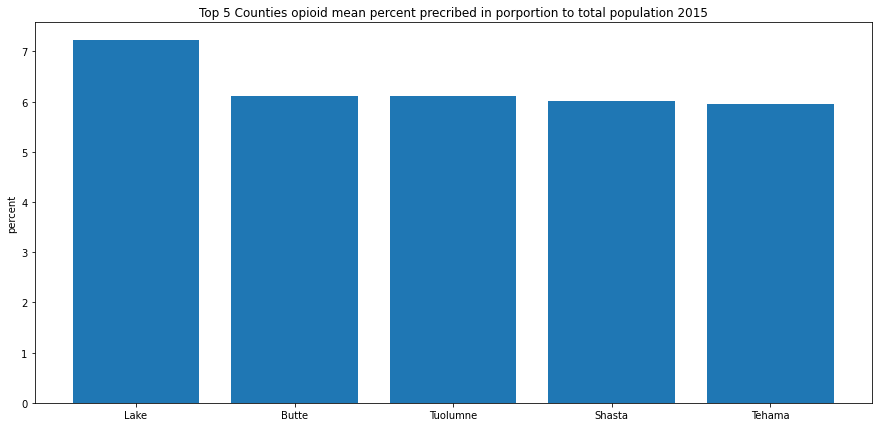

In [40]:
# 2015 top 5 % opioids precribed in porportion to population

five_top_county= fifteen_County_df.nlargest(5, ['opiod_pct'])


plt.bar(five_top_county['County'], five_top_county['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2015')

Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2016')

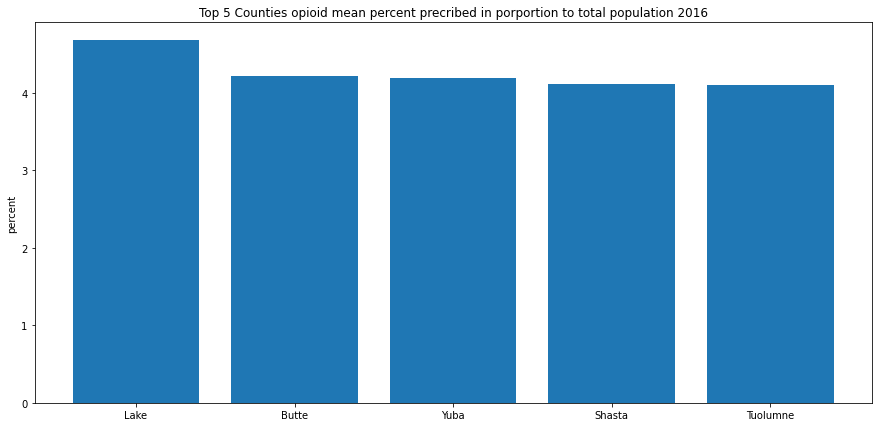

In [41]:
# 2016 top 5 % opioids precribed in porportion to population

sixteen_top_county= sixteen_County_df.nlargest(5, ['opiod_pct'])


plt.bar(sixteen_top_county['County'], sixteen_top_county['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2016')

Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2017')

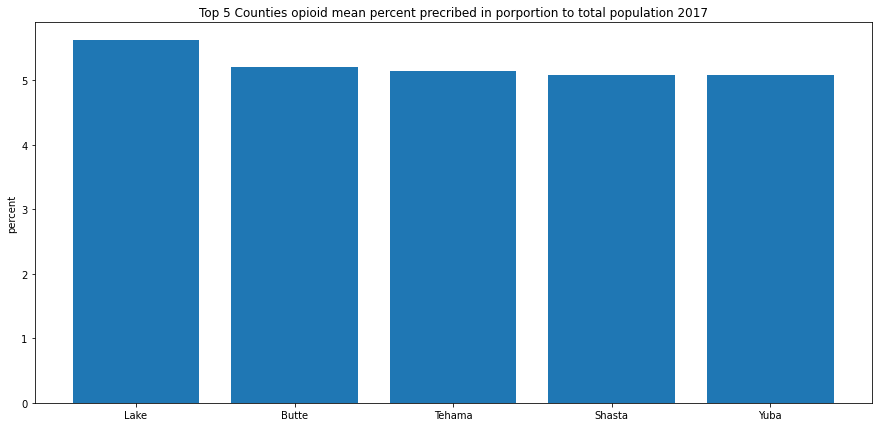

In [42]:
# 2017 top 5 % opioids precribed in porportion to population

seventeen_top_county= seventeen_County_df.nlargest(5, ['opiod_pct'])


plt.bar(seventeen_top_county['County'], seventeen_top_county['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2017')

Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2018')

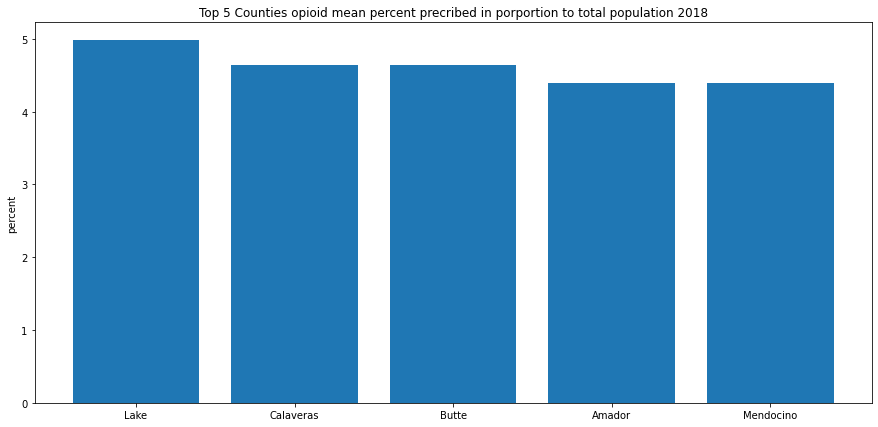

In [43]:
# 2018 top 5 % opioids precribed in porportion to population

eighteen_top_county= eighteen_County_df.nlargest(5, ['opiod_pct'])


plt.bar(eighteen_top_county['County'], eighteen_top_county['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2018')

Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2019')

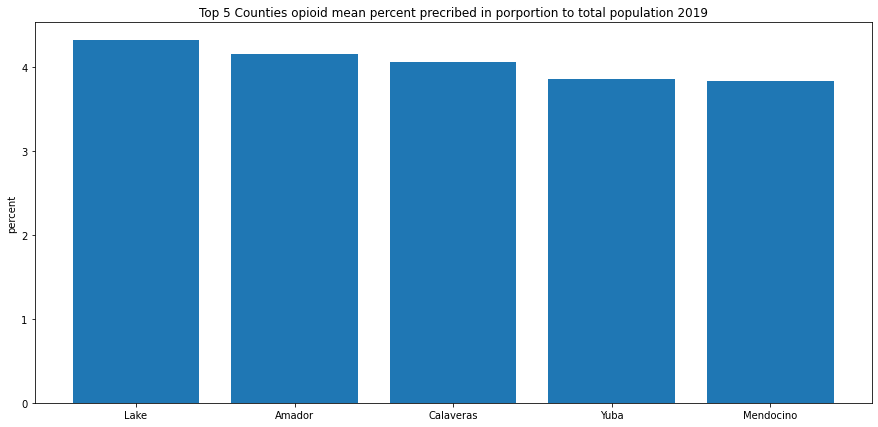

In [44]:
# 2019 top 5 % opioids precribed in porportion to population

nineteen_top_county= nineteen_County_df.nlargest(5, ['opiod_pct'])


plt.bar(nineteen_top_county['County'], nineteen_top_county['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2019')

Text(0.5, 1.0, 'Top 5 Counties opioid mean percent precribed in porportion to total population 2020')

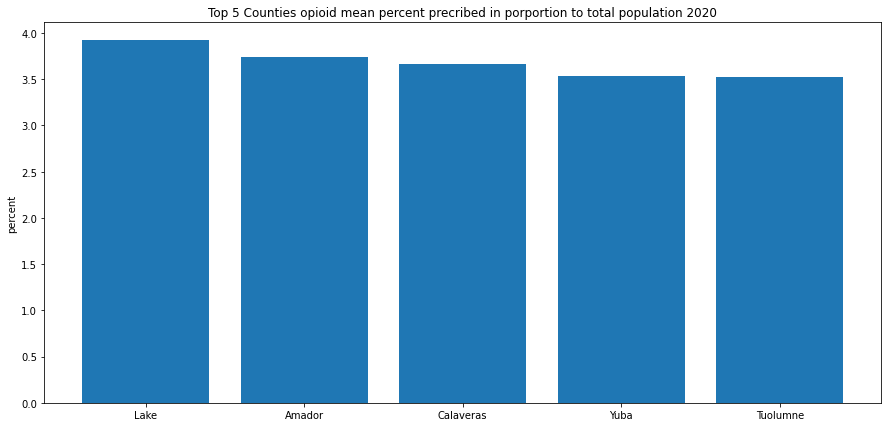

In [45]:
# 2020 top 5 % opioids precribed in porportion to population

twenty_top_county= twenty_County_df.nlargest(5, ['opiod_pct'])


plt.bar(twenty_top_county['County'], twenty_top_county['opiod_pct'])
plt.ylabel('percent')
plt.title('Top 5 Counties opioid mean percent precribed in porportion to total population 2020')

In [46]:
opiod_df.corr()

,xYear,PatCount_Opioid,Population,opiod_pct
xYear,1.000000e+00,-0.049967,-6.694713e-19,-0.180335
PatCount_Opioid,-4.996734e-02,1.000000,7.861910e-01,0.167756
Population,-6.694713e-19,0.786191,1.000000e+00,-0.082158
opiod_pct,-1.803351e-01,0.167756,-8.215800e-02,1.000000


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [49]:
# Assigning numerical values and storing in another column

opiod_df['num_label'] = labelencoder.fit_transform(opiod_df['label'])
opiod_df

,xYear,State,County,Age_Group,rundatetime,PatCount_Opioid,Population,Region,opiod_pct,label,num_label
0,2015,CA,Alameda,15-24 yrs,04APR2021:08:30:51,24853,1515717,Central Cali,1.6,low risk,1
1,2015,CA,Alpine,15-24 yrs,04APR2021:08:30:51,16,1115,Central Cali,1.4,low risk,1
2,2015,CA,Amador,15-24 yrs,04APR2021:08:30:51,726,38211,Central Cali,1.9,low risk,1
3,2015,CA,Butte,15-24 yrs,04APR2021:08:30:51,5971,220287,Northern Cali,2.7,low risk,1
4,2015,CA,Calaveras,15-24 yrs,04APR2021:08:30:51,921,45570,Central Cali,2.0,low risk,1
...,...,...,...,...,...,...,...,...,...,...,...
1735,2020,CA,Tulare,65-100 yrs,04APR2021:08:30:51,16256,438352,Central Cali,3.7,moderate risk,2
1736,2020,CA,Tuolumne,65-100 yrs,04APR2021:08:30:51,4170,54242,Central Cali,7.7,High risk,0
1737,2020,CA,Ventura,65-100 yrs,04APR2021:08:30:51,35165,827963,So Cal,4.2,moderate risk,2
1738,2020,CA,Yolo,65-100 yrs,04APR2021:08:30:51,7239,202753,Central Cali,3.6,moderate risk,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AAE7E84C8>]],
      dtype=object)

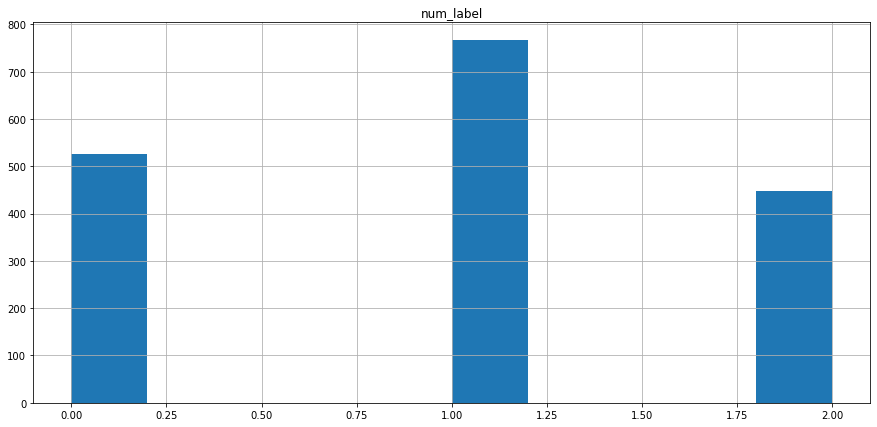

In [50]:
opiod_df.hist(column='num_label')

In [51]:
feature_names= ['Population', 'PatCount_Opioid']
X= opiod_df[feature_names]
y= opiod_df['num_label']

In [52]:
# setting up test, train set 

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60)



In [53]:
print("No. of samples in training set: ", X_train.shape[0])     # displaying total number of training set values
print("No. of samples in validation set:", X_test.shape[0])      # displaying total number of validation set values

No. of samples in training set:  1218
No. of samples in validation set: 522


In [55]:
# Decision tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.98      0.97      0.97       237
           2       0.91      0.88      0.90       138

    accuracy                           0.95       522
   macro avg       0.94      0.94      0.94       522
weighted avg       0.95      0.95      0.95       522



In [58]:
#K-Nearest Neighbors
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier


Xs = scale(X)


Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, random_state=60)
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.965517
k-NN score for training set: 0.987685
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       147
           1       1.00      0.97      0.99       237
           2       0.94      0.93      0.93       138

    accuracy                           0.97       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.97      0.97      0.97       522



In [71]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda_model= lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda_model.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda_model.score(X_test, y_test)))
y_true, y_pred = y_test, lda_model.predict(X_test)
print(classification_report(y_true, y_pred))

Accuracy of LDA classifier on training set: 0.57
Accuracy of LDA classifier on test set: 0.58
              precision    recall  f1-score   support

           0       0.69      0.31      0.42       147
           1       0.55      1.00      0.71       237
           2       0.92      0.17      0.28       138

    accuracy                           0.58       522
   macro avg       0.72      0.49      0.47       522
weighted avg       0.69      0.58      0.51       522



In [88]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model=gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb_model.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb_model.score(X_test, y_test)))
y_true, y_pred = y_test, gnb_model.predict(X_test)
print(classification_report(y_true, y_pred))

Accuracy of GNB classifier on training set: 0.50
Accuracy of GNB classifier on test set: 0.52
              precision    recall  f1-score   support

           0       0.47      0.12      0.19       147
           1       0.51      0.97      0.67       237
           2       0.59      0.16      0.25       138

    accuracy                           0.52       522
   macro avg       0.53      0.42      0.37       522
weighted avg       0.52      0.52      0.42       522



In [61]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C = 1.0)  # SVM model, linear kernal

svm_model=clf.fit(X_train,y_train)

y_predict= svm_model.predict(X_test)
y_true, y_pred = y_test, svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       138

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



In [62]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)



In [63]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [65]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
print(confusion_matrix(y_test, rbf_pred))
print(classification_report(y_test, rbf_pred))

Accuracy (RBF Kernel):  45.40
F1 (RBF Kernel):  28.35
[[  0 147   0]
 [  0 237   0]
 [  0 138   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.45      1.00      0.62       237
           2       0.00      0.00      0.00       138

    accuracy                           0.45       522
   macro avg       0.15      0.33      0.21       522
weighted avg       0.21      0.45      0.28       522



C:\Users\EF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print(confusion_matrix(y_test, poly_pred))
print(classification_report(y_test, poly_pred))

Accuracy (Polynomial Kernel):  46.55
F1 (Polynomial Kernel):  30.96
[[  2 145   0]
 [  0 237   0]
 [  4 130   4]]
              precision    recall  f1-score   support

           0       0.33      0.01      0.03       147
           1       0.46      1.00      0.63       237
           2       1.00      0.03      0.06       138

    accuracy                           0.47       522
   macro avg       0.60      0.35      0.24       522
weighted avg       0.57      0.47      0.31       522



In [68]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

C:\Users\EF\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


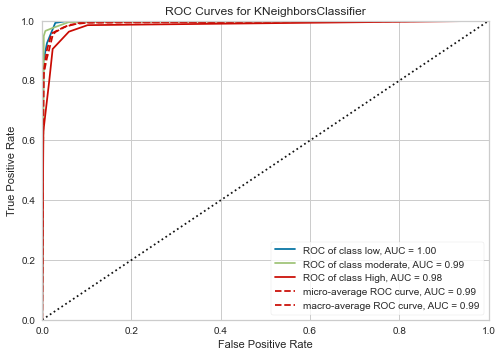

In [69]:
# Instaniate the classification model and visualizer

from sklearn.neighbors import KNeighborsClassifier





# Instaniate the classification model and visualizer
model = KNeighborsClassifier()
visualizer = ROCAUC(model, classes=["low", "moderate", "High"])

visualizer.fit(Xs_train, y_train)        # Fit the training data to the visualizer
visualizer.score(Xs_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [85]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [89]:
#Multi-layer Perceptron classifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
y_true, y_pred = y_test, NN.predict(X_test)

print('Accuracy of MLP on training set: {:.2f}'
     .format(NN.score(X_train, y_train)))
print('Accuracy of MLP on test set: {:.2f}'
     .format(NN.score(X_test, y_test)))
print(classification_report(y_true, y_pred))

Accuracy of MLP on training set: 0.31
Accuracy of MLP on test set: 0.28
              precision    recall  f1-score   support

           0       0.28      1.00      0.44       147
           1       0.00      0.00      0.00       237
           2       0.00      0.00      0.00       138

    accuracy                           0.28       522
   macro avg       0.09      0.33      0.15       522
weighted avg       0.08      0.28      0.12       522



C:\Users\EF\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\EF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Random forest model

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
y_true, y_pred = y_test, RF.predict(X_test)

print('Accuracy of Random Forest on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))
print(classification_report(y_true, y_pred))

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.96
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       147
           1       1.00      0.97      0.99       237
           2       0.93      0.93      0.93       138

    accuracy                           0.96       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.96      0.96      0.96       522

